In [13]:
import pandas as pd

# Load the dataset
file_path = '../data/reviews/wine_reviews.csv'  # Adjust this path if necessary
wine_data = pd.read_csv(file_path)

# Display the first few rows
print(wine_data.head())


                                              review
0  Easily the best Sauvignon Blanc I've had to da...
1                    Excellent, Mockingbird Inn?\r\n
2  Absolutely incredible. One of the best sauvign...
3                   Reported in nytimes. Did not try
4  Great. Much different than other Sauv Blancs s...


In [14]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [18]:
from transformers import pipeline

# Specify device=0 if you have a GPU or device=-1 for CPU
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", framework="pt")


In [19]:
labels = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]


In [20]:
# Assuming the review text is in a column named 'review'
def classify_review(review):
    if pd.isnull(review):  # Handle missing reviews
        return "other"
    result = classifier(review, labels)
    return result["labels"][0]  # Return the top label

# Apply the classifier to each review
wine_data["talks_about"] = wine_data["review"].apply(classify_review)

# Display the updated DataFrame
print(wine_data.head())


                                              review        talks_about
0  Easily the best Sauvignon Blanc I've had to da...  talks about taste
1                    Excellent, Mockingbird Inn?\r\n  talks about taste
2  Absolutely incredible. One of the best sauvign...  talks about taste
3                   Reported in nytimes. Did not try              other
4  Great. Much different than other Sauv Blancs s...              other


In [21]:
output_path = '../data/reviews/wine_reviews_with_labels.csv'
wine_data.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")


Updated dataset saved to ../data/reviews/wine_reviews_with_labels.csv


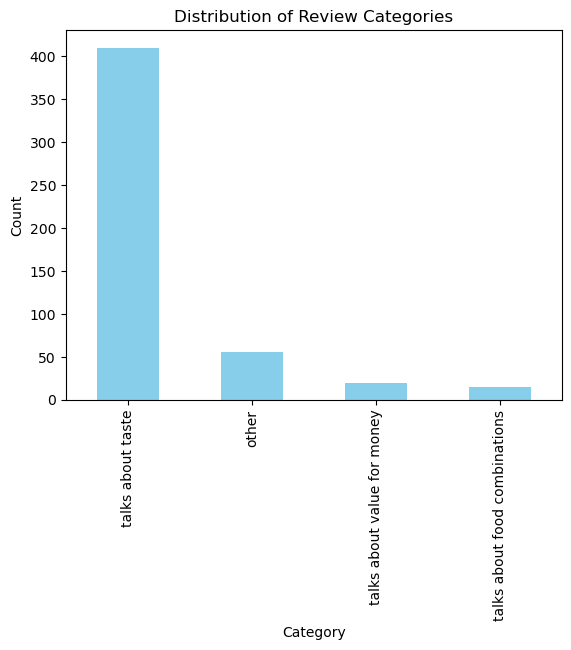

In [22]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = wine_data["talks_about"].value_counts()

# Create a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Review Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
